#### BIBLIOTECAS

In [1]:
import unidecode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wordcloud import WordCloud
from nltk import tokenize
import nltk
from string import punctuation
from nltk import ngrams
import joblib

In [ ]:
# Vetorizar os dados com a CountVectorizer da sklearn
from sklearn.feature_extraction.text import CountVectorizer
# Separando meus dados em dados de teste e dados de treino ()
from sklearn.model_selection import train_test_split

#### BASE DE DADOS DE TREINO E TESTE

In [3]:
# Acessando dados de filmes classificados como positivos e negativos
resenha = pd.read_csv('imdb-reviews-pt-br.csv')

In [4]:
# Criando a coluna de classficiação usando 0 para negativo e 1 para positivo
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])

resenha["classificacao"] = classificacao
resenha.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_2828\4020483322.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])


,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [5]:
# Verificar se a base e está balanceada
print(resenha["classificacao"].value_counts())

# Posteriormente realizar um bancelamento exato dos dados para ver se acontece alguma diferença.

classificacao
0    24765
1    24694
Name: count, dtype: int64


#### TRATAMENTO DOS DADOS

O modelo saco-de-palavras é uma representação simplificada utilizada no processamento de linguagem natural, atraves de números e vetores.

In [6]:
# Vetorizar os dados com a CountVectorizer da sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# Utilizando o parâmetro max_features, para criar um vetor do tamanho que quisermos, para evitar processar tudo e consumir muita memoria
# **** é suficiente para a quantidade de dados
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])

In [8]:
print(bag_of_words)

  (0, 48)	2
  (0, 47)	3
  (0, 19)	1
  (0, 34)	2
  (0, 27)	4
  (0, 24)	2
  (0, 8)	4
  (0, 36)	7
  (0, 7)	4
  (0, 29)	3
  (0, 18)	3
  (0, 30)	4
  (0, 26)	2
  (0, 4)	2
  (0, 9)	2
  (0, 45)	1
  (0, 35)	2
  (0, 11)	1
  (0, 5)	1
  (0, 1)	1
  (0, 40)	1
  (0, 41)	1
  (0, 31)	1
  (0, 39)	1
  (0, 32)	1
  :	:
  (49457, 0)	1
  (49457, 3)	2
  (49457, 6)	1
  (49458, 48)	5
  (49458, 47)	4
  (49458, 8)	3
  (49458, 36)	3
  (49458, 7)	11
  (49458, 30)	3
  (49458, 1)	1
  (49458, 31)	2
  (49458, 33)	2
  (49458, 20)	1
  (49458, 43)	1
  (49458, 38)	1
  (49458, 13)	2
  (49458, 49)	1
  (49458, 37)	1
  (49458, 25)	2
  (49458, 12)	1
  (49458, 46)	2
  (49458, 3)	1
  (49458, 6)	1
  (49458, 2)	1
  (49458, 22)	1


In [9]:
# Criar DataFrame esparsa
matriz_esparsa2 = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                    columns=vetorizar.get_feature_names_out())

In [10]:
matriz_esparsa2

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,...,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,...,0,0,0,0,3,0,0,4,1,2


Regressão logística é um modelo de aprendizado de máquina que é usado para prever uma variável categórica, como "sim" ou "não", "aceito" ou "rejeitado", "doente" ou "saudável". A regressão logística é uma técnica probabilística, o que significa que ela retorna uma probabilidade para cada classe.

In [11]:
# Separando meus dados em dados de teste e dados de treino ()
from sklearn.model_selection import train_test_split

# Se não passarmos os parametros de valores de treino e teste, por padrão é 75% de treino e 25% de teste
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha["classificacao"],
                                                              random_state=42)

#

In [12]:
# Usando a regressão logistica para criar o modelo
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(solver="lbfgs")
regressao_logistica.fit(treino, classe_treino)
previsao_teste = regressao_logistica.predict_proba(teste)

In [13]:
# Calculando acuracia
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia1 = regressao_logistica.score(teste, classe_teste)
print(acuracia1)

0.6583097452486858


In [14]:
# Criando a função para classificação de sentimentos

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                  texto[coluna_classificacao],
                                                                  random_state=42)
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)


print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


#### TRATAMENTO DE DADOS 1

Wordcloud: Nuvem de palavras: Para melhorar nossos dados, eliminando palavras sem nexo para as analises

In [15]:
%matplotlib inline

from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in resenha["text_pt"]])

In [16]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(todos_palavras)

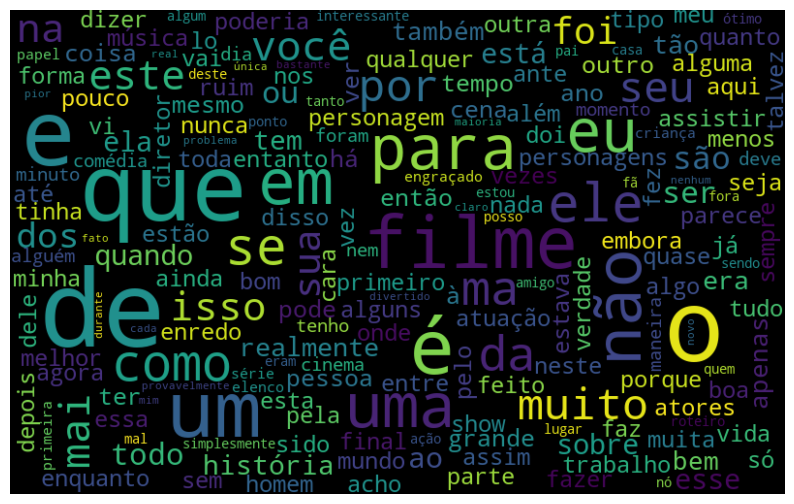

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Nuvem para classificação positiva
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join(
        [texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                               max_font_size=110,
                               collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

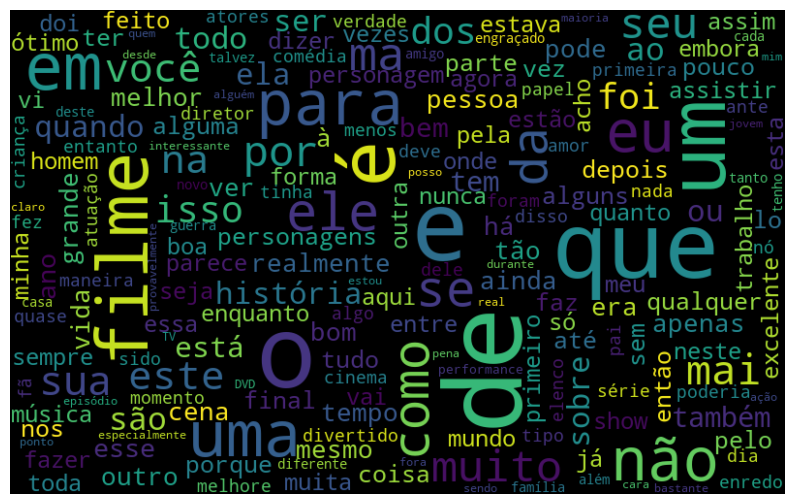

In [19]:
nuvem_palavras_pos(resenha, "text_pt")

In [20]:
# Nuvem para classificação negativa
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join(
        [texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                               max_font_size=110,
                               collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

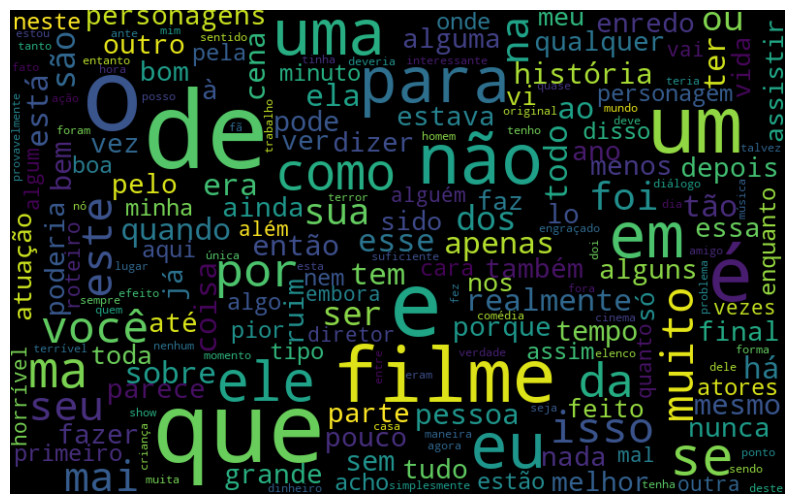

In [21]:
nuvem_palavras_neg(resenha, "text_pt")

#### TRATAMENTO DE DADOS 2
Tokenização com NLTK para criar uma nova visualização em quantidade de repetições por palavras e ajudar a entender o que precisa ser desconsiderado na analise

In [22]:
from nltk import tokenize
import nltk

In [23]:
todas_palavras = ' '.join([texto for texto in resenha["text_pt"]])
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [24]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})

In [25]:
df_frequencia.head()

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [26]:
# Visualizando as 10 maiores
df_frequencia = df_frequencia.nlargest(columns="Frequência", n=10)
df_frequencia

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


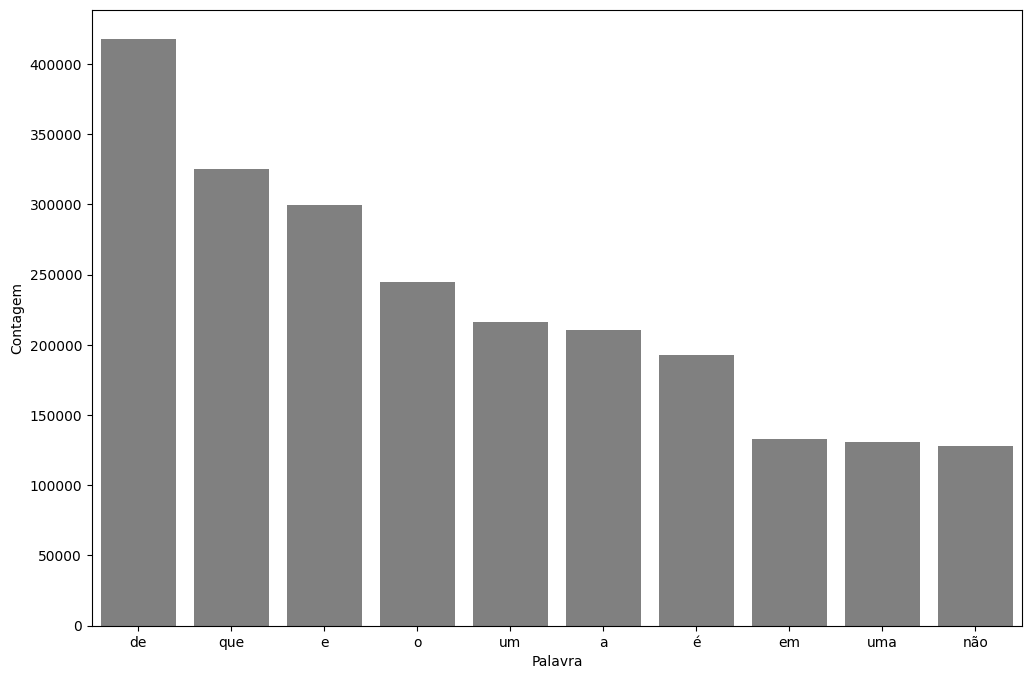

In [27]:
# Criando uma visualização das frequencias de palavras em gráfico de barras, criando uma função:
import seaborn as sns


def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencia, x="Palavra",
                     y="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()


pareto(resenha, "text_pt", 10)

Removendo palavras que não agrega com a nltk.corpus.stopwords.words, que é uma uma lista com esses dados

In [28]:
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Separar palavra por paalavra em uma lista, para abalisar e depois colocar em uma coluna nova no df resenha
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [30]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [31]:
# Verificando acuracia com esse tratamento
acuracia2 = classificar_texto(resenha, "tratamento_1", "classificacao")
print(acuracia2)
print(acuracia1)

0.6810351799433886
0.6583097452486858


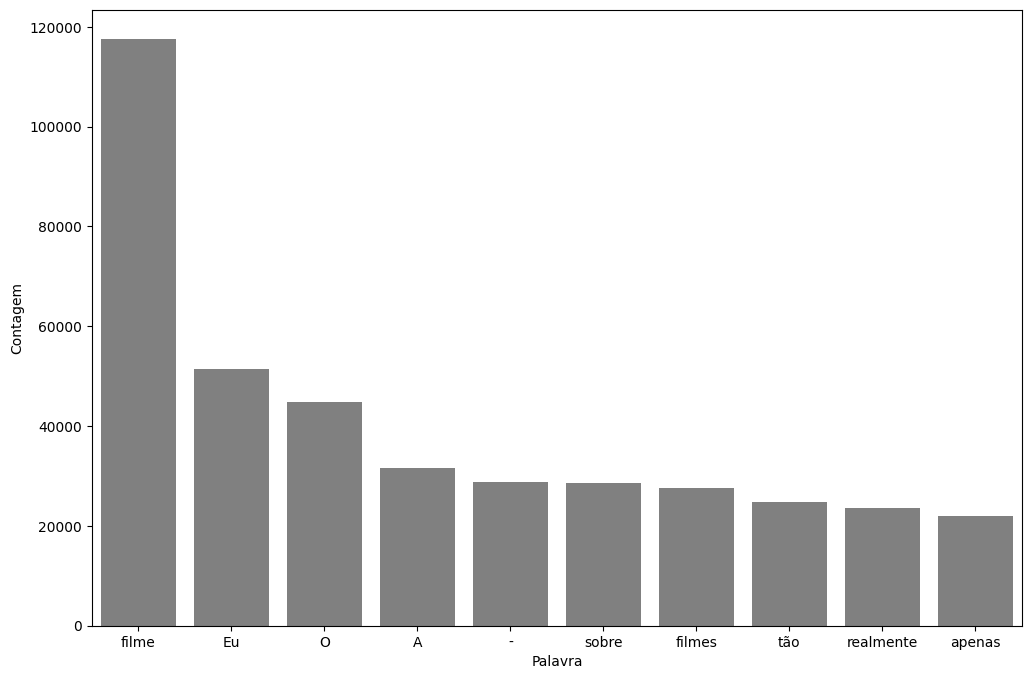

In [32]:
pareto(resenha, "tratamento_1", 10)

In [33]:
# Retirar pontuações
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [34]:
# Retirar pontuações

from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

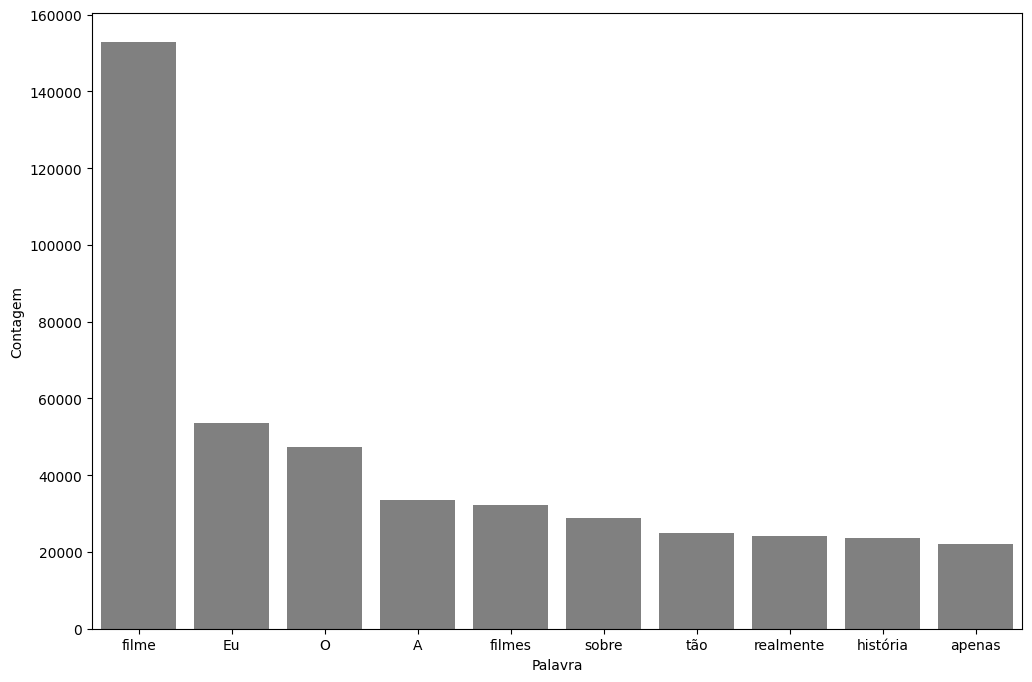

In [35]:
pareto(resenha, "tratamento_2", 10)

Normalizar os textos com a biblioteca unidecode, import unidecode, para tirar caracteres especiais

In [36]:
# Aplicando na coluna tratamento_2
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [37]:
# Criando uma lista atualizada com os stopwords
stopwords_sem_acento = [unidecode.unidecode(
    texto) for texto in pontuacao_stopwords]

In [40]:
# Criando uma nova coluna com esse nobo tratamento da unicode
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

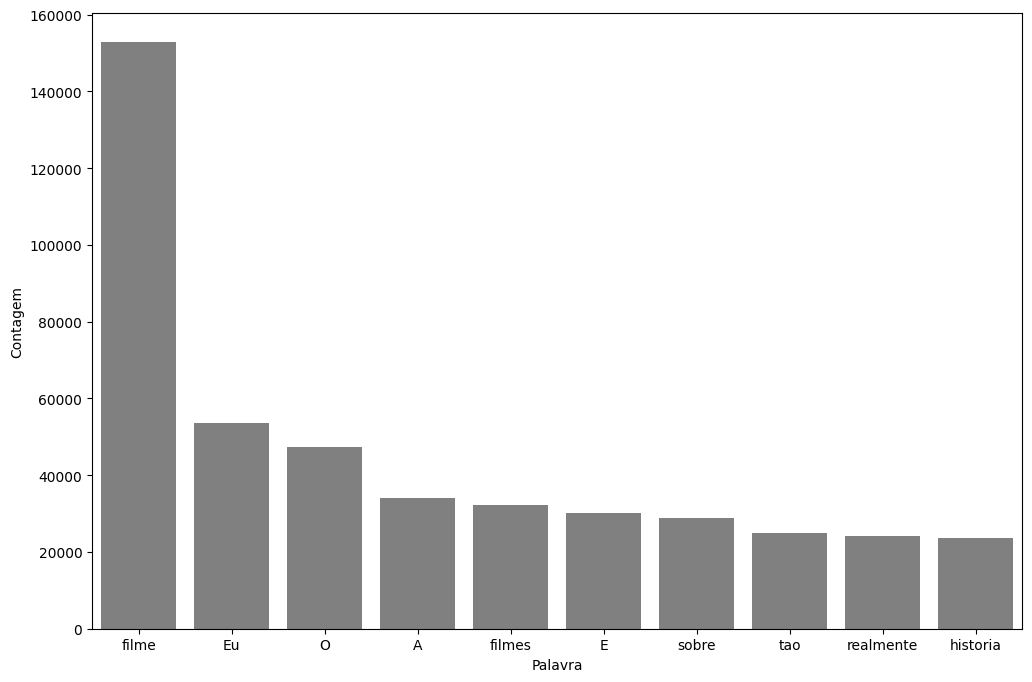

In [41]:
pareto(resenha, "tratamento_3", 10)

In [42]:
acuracia3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia3)
print(acuracia2)
print(acuracia1)

0.6887990295188031
0.6810351799433886
0.6583097452486858


In [45]:
# Deixar tudo minusculo
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

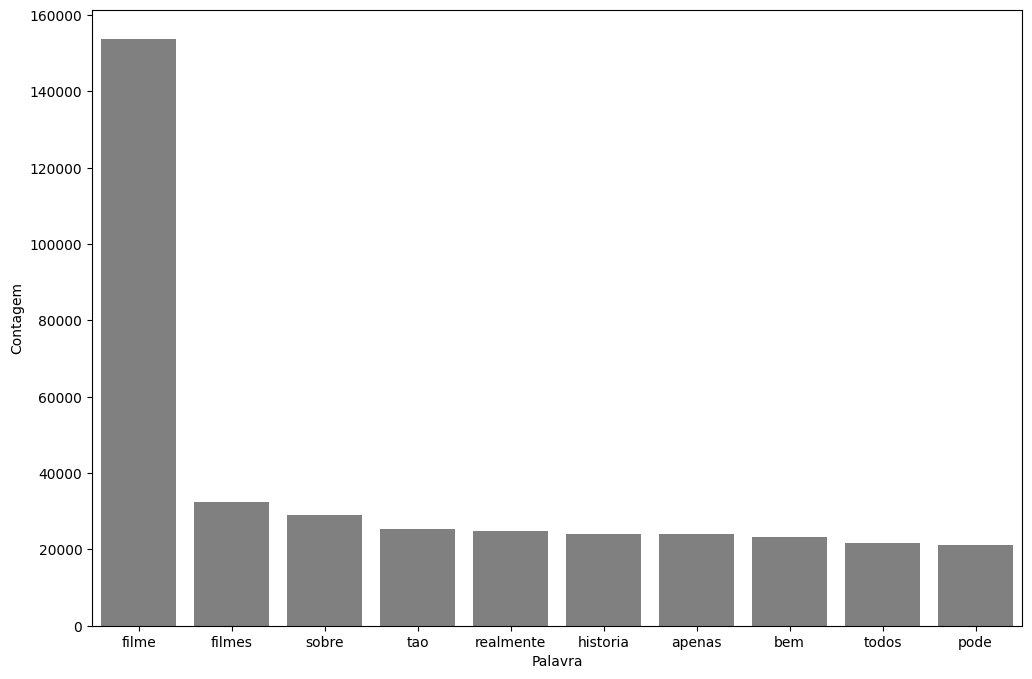

In [46]:
pareto(resenha, "tratamento_4", 10)

Evitando derivações de palavras com a "stemização" - reduzir uma palavra com determinadas variações a um radical comum, com a RSLPStemmer(), presente na biblioteca nltk.

In [47]:
nltk.download('rslp')
stemmer = nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


In [48]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

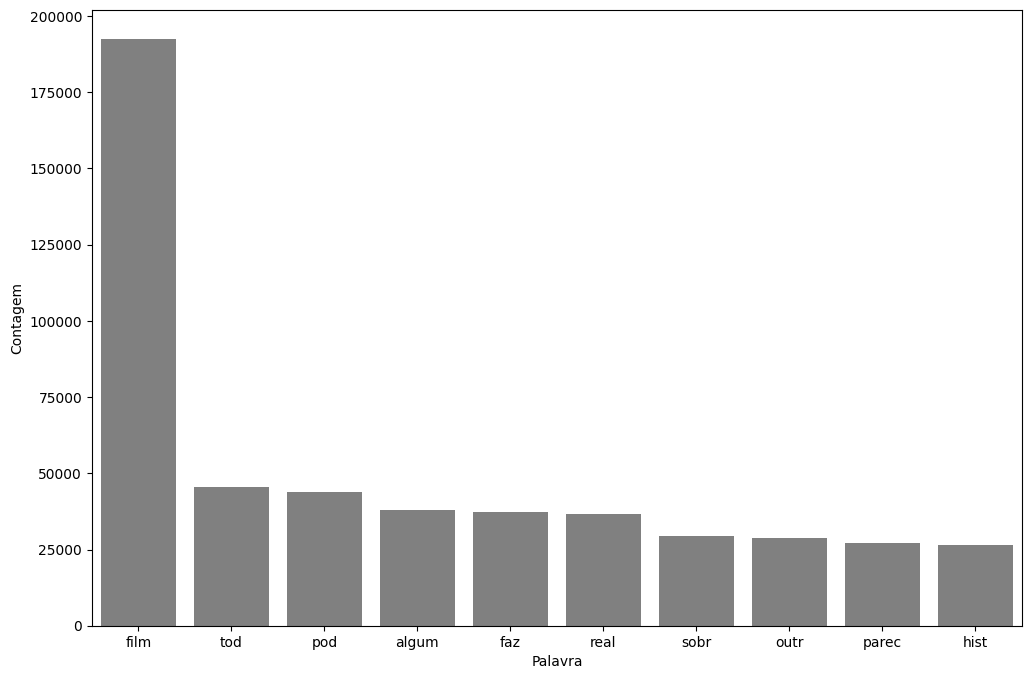

In [49]:
pareto(resenha, "tratamento_5", 10)

In [50]:
acuracia4 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia4)
print(acuracia3)
print(acuracia2)
print(acuracia1)

0.6955923978972908
0.6887990295188031
0.6810351799433886
0.6583097452486858


#### TRATAMENTO DE DADOS 3

Aplicando pesos ao saco de palavras com a TF-IDF (Term Frequency-Inverse Document Frequency)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Atribuindo função TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

# Exemplo
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()

)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [55]:
# Agora com os dados tratados
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha["classificacao"],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6964820056611403


Agora vamos manter uma sequencia das palavras, criando pares com a biblioteca ngrams

In [56]:
# Exemplo
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
# Criando 2 pares
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [57]:
# fazendo isso com os dados tratamento_5 no modelo de regressao_logistica
tfidf1 = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf1.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf, resenha["classificacao"], random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.886696320258795


Atribuindo pesos

In [61]:
tfidf

TfidfVectorizer(lowercase=False, max_features=50)

In [62]:
tfidf1

TfidfVectorizer(lowercase=False, ngram_range=(1, 2))

In [63]:
pesos = pd.DataFrame(regressao_logistica.coef_[
                     0].T, index=tfidf1.get_feature_names_out())

In [65]:
pesos.nlargest(10, 0)

,0
otim,9.805996
excel,9.176871
perfeit,7.041964
maravilh,6.379170
favorit,5.915423
incri,5.843020
divert,5.377406
brilh,4.938538
ador,4.603252
hoj,4.547631


In [66]:
pesos.nsmallest(10, 0)

,0
ruim,-11.526661
pi,-11.351851
horri,-9.804468
terri,-8.456541
chat,-7.724487
nad,-7.658226
parec,-6.793719
nenhum,-6.411036
tent,-5.947673
mal,-5.764175


#### SALVAR O MODELO DE ANALISADOR DE SENTIMENTO

In [67]:
# Salvar o modelo
import joblib

# Supondo que você já treinou o modelo conforme mencionado na pergunta
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf, resenha["classificacao"], random_state=150)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8871815608572584


In [68]:
# Salvar o modelo treinado
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')  # Salvar o TfidfVectorizer também

['tfidf_vectorizer.pkl']

In [2]:
# Salvar o modelo
import joblib
# Carregar o modelo e o vetorizador para fazer previsões em novos dados
modelo_carregado = joblib.load('modelo_regressao_logistica.pkl')
tfidf_carregado = joblib.load('tfidf_vectorizer.pkl')

In [8]:
# Exemplo de como usar o modelo carregado e o vetorizador para fazer previsões
novo_dado = tfidf_carregado.transform(["A pior internet do Brasil"])
previsao = modelo_carregado.predict(novo_dado)

print("Resultado da previsão:", previsao)

Resultado da previsão: [0]
